# Google Cloud Natural Language API Demo
#### Further Documentation:
https://cloud.google.com/natural-language/docs
https://cloud.google.com/natural-language/docs/basics
https://cloud.google.com/natural-language/docs/how-to

## Introduction

The Natural Language API has several methods for performing analysis and annotation on your text. Each level of analysis provides valuable information for language understanding. These methods are listed below:

**Sentiment analysis** inspects the given text and identifies the prevailing emotional opinion within the text, especially to determine a writer's attitude as positive, negative, or neutral. This method returns the sentiment of the text as a whole as well as the sentiment of individual sentences within it. Sentiment analysis is performed through the analyzeSentiment method.

**Entity analysis** inspects the given text for known entities (Proper nouns such as public figures, landmarks, and so on. Common nouns such as restaurant, stadium, and so on.) and returns information about those entities. This includes a Wikipedia link (if applicable), the entity type and the salience (a measure of the relevance of the entity to the entire text). Entity analysis is performed with the analyzeEntities method.

**Entity sentiment analysis** inspects the given text for known entities (proper nouns and common nouns), returns information about those entities, and identifies the prevailing emotional opinion of the entity within the text, especially to determine a writer's attitude toward the entity as positive, negative, or neutral. An example of how this might be used is when presented with a sentence that contains a number of different emotions; for example, "I liked the food but the service was terrible". Entity analysis is performed with the analyzeEntitySentiment method.

**Syntactic analysis** extracts linguistic information, breaking up the given text into a series of sentences and tokens (generally, word boundaries), providing further analysis on those tokens. For each word in the text, the API tells you the word's part of speech (noun, verb, adjective, etc.) and how it relates to other words in the sentence. Syntactic Analysis is performed with the analyzeSyntax method.

**Content classification** analyzes text content and returns a content category for the content. Content classification is performed by using the classifyText method.

Each API call also detects and returns the language, if a language is not specified by the caller in the initial request. A full list of supported languages can be found here: https://cloud.google.com/natural-language/docs/languages

Additionally, if you wish to perform several natural language operations on given text using only one API call, the annotateText request can also be used to perform sentiment analysis and entity analysis.


## The Natural Language API: Set Up And Examples

#### Setup

Ensure you have enabled billing, the cloud natural language APIs, and have a service account before running this notebook. 

You may also need to restart your kernel ('Kernel' in the menu). 

In [1]:
pip install --user --upgrade google-cloud-language

     |████████████████████████████████| 149 kB 6.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import google-cloud-language
# Make sure that you have installed or upgraded to the latest google-cloud-language using pip
from google.cloud import language_v1 as language
import pandas as pd
#Print all columns and all rows in a panda dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### Set up functions to call Google Natural Language API
Here are some examples of the API in action <br>
Sentiment Analysis:

In [2]:
# Code from Google at https://codelabs.developers.google.com/codelabs/cloud-natural-language-python3#7
# Probably would be better off changing all the functions to follow the Google standard ones from the codelab, and then making 
# small modifications to the rest of the code to make it all work together.

def analyze_text_sentiment(text):
    client = language.LanguageServiceClient()
    document = language.Document(content=text, type_=language.Document.Type.PLAIN_TEXT)

    response = client.analyze_sentiment(document=document)

    sentiment = response.document_sentiment
    results = dict(
        text=text,
        score=f"{sentiment.score:.1%}",
        magnitude=f"{sentiment.magnitude:.1%}",
    )
    
    # Get sentiment for all sentences in the document
    sentence_sentiment = []
    for sentence in response.sentences:
        item={}
        item["text"]=sentence.text.content
        item["sentiment score"]=sentence.sentiment.score
        item["sentiment magnitude"]=sentence.sentiment.magnitude
        sentence_sentiment.append(item)
    
    return sentence_sentiment

In [3]:
text = "Stocks are going down on the NASDAQ"
analyze_text_sentiment(text)

[{'text': 'Stocks are going down on the NASDAQ',
  'sentiment score': -0.699999988079071,
  'sentiment magnitude': 0.699999988079071}]

Syntactic Analysis:

In [5]:
# Syntax Analysis
def gcp_analyze_syntax(text, debug=0):
    """
    Analyzing Syntax in a String

    Args:
      text The text content to analyze
    """

    client = language.LanguageServiceClient()
    document = language.Document(content=text, type_=language.Document.Type.PLAIN_TEXT)
    response = client.analyze_syntax(document=document)
    
    output = []   
    # Loop through tokens returned from the API
    for token in response.tokens:
        word = {}
        # Get the text content of this token. Usually a word or punctuation.
        text = token.text  

        # Get the part of speech information for this token.
        # Parts of spech are as defined in:
        # http://www.lrec-conf.org/proceedings/lrec2012/pdf/274_Paper.pdf
        part_of_speech = token.part_of_speech
        # Get the tag, e.g. NOUN, ADJ for Adjective, et al.
        
        # Get the dependency tree parse information for this token.
        # For more information on dependency labels:
        # http://www.aclweb.org/anthology/P13-2017
        dependency_edge = token.dependency_edge   
        
        word["word"]=text.content
        word["begin_offset"]=text.begin_offset        
        word["part_of_speech"]=language.PartOfSpeech.Tag(part_of_speech.tag).name
        
        # Get the voice, e.g. ACTIVE or PASSIVE
        word["Voice"]=language.PartOfSpeech.Voice(part_of_speech.voice).name
        word["Tense"]=language.PartOfSpeech.Tense(part_of_speech.tense).name
        
        # See API reference for additional Part of Speech information available
        # Get the lemma of the token. Wikipedia lemma description
        # https://en.wikipedia.org/wiki/Lemma_(morphology)        
        word["Lemma"]=token.lemma
        word["index"]=dependency_edge.head_token_index
        word["Label"]=language.DependencyEdge.Label(dependency_edge.label).name
        
        if debug:
            print(u"Token text: {}".format(text.content))
            print(
                u"Location of this token in overall document: {}".format(text.begin_offset)
            ) 
            print(
                u"Part of Speech tag: {}".format(
                    language.PartOfSpeech.Tag(part_of_speech.tag).name
                )
            )        

            print(u"Voice: {}".format(language.PartOfSpeech.Voice(part_of_speech.voice).name))
            # Get the tense, e.g. PAST, FUTURE, PRESENT, et al.
            print(u"Tense: {}".format(language.PartOfSpeech.Tense(part_of_speech.tense).name))

            print(u"Lemma: {}".format(token.lemma))

            print(u"Head token index: {}".format(dependency_edge.head_token_index))
            print(
                u"Label: {}".format(language.DependencyEdge.Label(dependency_edge.label).name)
            )
        
        output.append(word)
        

    # Get the language of the text, which will be the same as
    # the language specified in the request or, if not specified,
    # the automatically-detected language.
    if debug:
        print(u"Language of the text: {}".format(response.language))
    return (output)

In [6]:
gcp_analyze_syntax(text)

[{'word': 'Stocks',
  'begin_offset': -1,
  'part_of_speech': 'NOUN',
  'Voice': 'VOICE_UNKNOWN',
  'Tense': 'TENSE_UNKNOWN',
  'Lemma': 'stock',
  'index': 2,
  'Label': 'NSUBJ'},
 {'word': 'are',
  'begin_offset': -1,
  'part_of_speech': 'VERB',
  'Voice': 'VOICE_UNKNOWN',
  'Tense': 'PRESENT',
  'Lemma': 'be',
  'index': 2,
  'Label': 'AUX'},
 {'word': 'going',
  'begin_offset': -1,
  'part_of_speech': 'VERB',
  'Voice': 'VOICE_UNKNOWN',
  'Tense': 'PRESENT',
  'Lemma': 'go',
  'index': 2,
  'Label': 'ROOT'},
 {'word': 'down',
  'begin_offset': -1,
  'part_of_speech': 'ADV',
  'Voice': 'VOICE_UNKNOWN',
  'Tense': 'TENSE_UNKNOWN',
  'Lemma': 'down',
  'index': 2,
  'Label': 'ADVMOD'},
 {'word': 'on',
  'begin_offset': -1,
  'part_of_speech': 'ADP',
  'Voice': 'VOICE_UNKNOWN',
  'Tense': 'TENSE_UNKNOWN',
  'Lemma': 'on',
  'index': 2,
  'Label': 'PREP'},
 {'word': 'the',
  'begin_offset': -1,
  'part_of_speech': 'DET',
  'Voice': 'VOICE_UNKNOWN',
  'Tense': 'TENSE_UNKNOWN',
  'Lemma':

Entity Analysis:

In [7]:
# Entity Analysis
def gcp_analyze_entities(text, debug=0):
    """
    Analyzing Entities in a String

    Args:
      text_content The text content to analyze
    """

    client = language.LanguageServiceClient()
    document = language.Document(content=text, type_=language.Document.Type.PLAIN_TEXT)
    response = client.analyze_entities(document=document)
    output = []   
    
    # Loop through entitites returned from the API
    for entity in response.entities:
        item = {}
        item["name"]=entity.name
        item["type"]=language.Entity.Type(entity.type_).name
        item["Salience"]=entity.salience
        
        if debug:
            print(u"Representative name for the entity: {}".format(entity.name))

            # Get entity type, e.g. PERSON, LOCATION, ADDRESS, NUMBER, et al
            print(u"Entity type: {}".format(language.Entity.Type(entity.type_).name))

            # Get the salience score associated with the entity in the [0, 1.0] range
            print(u"Salience score: {}".format(entity.salience))

        # Loop over the metadata associated with entity. For many known entities,
        # the metadata is a Wikipedia URL (wikipedia_url) and Knowledge Graph MID (mid).
        # Some entity types may have additional metadata, e.g. ADDRESS entities
        # may have metadata for the address street_name, postal_code, et al.
        for metadata_name, metadata_value in entity.metadata.items():
            item[metadata_name]=metadata_value
            if debug:
                print(u"{}: {}".format(metadata_name, metadata_value))

        # Loop over the mentions of this entity in the input document.
        # The API currently supports proper noun mentions.
        if debug:
            for mention in entity.mentions:
                print(u"Mention text: {}".format(mention.text.content))
                # Get the mention type, e.g. PROPER for proper noun
                print(
                    u"Mention type: {}".format(language.EntityMention.Type(mention.type_).name)
                )
        output.append(item)
    
    # Get the language of the text, which will be the same as
    # the language specified in the request or, if not specified,
    # the automatically-detected language.
    if debug:
        print(u"Language of the text: {}".format(response.language))
    
    return(output)

In [8]:
gcp_analyze_entities(text)

[{'name': 'Stocks', 'type': 'OTHER', 'Salience': 0.8703455328941345},
 {'name': 'NASDAQ',
  'type': 'ORGANIZATION',
  'Salience': 0.12965445220470428,
  'mid': '/m/05dq_',
  'wikipedia_url': 'https://en.wikipedia.org/wiki/Nasdaq'}]

Content Classification:

In [9]:
# Content Classification

def gcp_classify_text(text):
    client = language.LanguageServiceClient()
    document = language.Document(content=text, type_=language.Document.Type.PLAIN_TEXT)

    response = client.classify_text(document=document)

    for category in response.categories:
        print("=" * 80)
        print(f"category  : {category.name}")
        print(f"confidence: {category.confidence:.0%}")

A longer piece of text is required.

In [10]:
text="Although most people consider piranhas to be quite dangerous, they are, for the most part, entirely harmless. \n\
Piranhas rarely feed on large animals; they eat smaller fish and aquatic plants. When confronted with humans, piranhas’ \n\
first instinct is to flee, not attack. Their fear of humans makes sense. Far more piranhas are eaten by people than people \n\
are eaten by piranhas. If the fish are well-fed, they won’t bite humans."

gcp_classify_text(text)

category  : /Hobbies & Leisure
confidence: 81%
category  : /Pets & Animals/Wildlife
confidence: 66%


## Demo 1 - Process a single news article

#### Analyze Syntax
Syntactic Analysis breaks up the given text into a series of sentences and tokens and provides linguistic information about those tokens

In [11]:
text_syntax=gcp_analyze_syntax(text)
df_syntax = pd.DataFrame(text_syntax)
df_syntax

,word,begin_offset,part_of_speech,Voice,Tense,Lemma,index,Label
0,Although,-1,ADP,VOICE_UNKNOWN,TENSE_UNKNOWN,Although,3,MARK
1,most,-1,ADJ,VOICE_UNKNOWN,TENSE_UNKNOWN,most,2,AMOD
2,people,-1,NOUN,VOICE_UNKNOWN,TENSE_UNKNOWN,person,3,NSUBJ
3,consider,-1,VERB,VOICE_UNKNOWN,PRESENT,consider,11,ADVCL
4,piranhas,-1,NOUN,VOICE_UNKNOWN,TENSE_UNKNOWN,piranha,6,NSUBJ
5,to,-1,PRT,VOICE_UNKNOWN,TENSE_UNKNOWN,to,6,AUX
6,be,-1,VERB,VOICE_UNKNOWN,TENSE_UNKNOWN,be,3,XCOMP
7,quite,-1,ADV,VOICE_UNKNOWN,TENSE_UNKNOWN,quite,8,ADVMOD
8,dangerous,-1,ADJ,VOICE_UNKNOWN,TENSE_UNKNOWN,dangerous,6,ACOMP
9,",",-1,PUNCT,VOICE_UNKNOWN,TENSE_UNKNOWN,",",11,P


#### Analyze Entities
Entity Analysis inspects the given text for known entities (proper nouns such as public figures, landmarks, etc.), and returns information about those entities.

In [12]:
entities=gcp_analyze_entities(text)
df_entities = pd.DataFrame(entities)
df_entities

,name,type,Salience
0,piranhas,OTHER,0.639721
1,people,PERSON,0.122904
2,part,OTHER,0.039671
3,humans,PERSON,0.039253
4,people,PERSON,0.022413
5,piranhas,OTHER,0.018652
6,fish,OTHER,0.014871
7,instinct,OTHER,0.014522
8,plants,LOCATION,0.013237
9,animals,OTHER,0.013077


#### Classify Documents
Google Natual Language API classifies documents into these major categories: <br>
Adult

Arts & Entertainment

Autos & Vehicles

Beauty & Fitness

Books & Literature

Business & Industrial

Computers & Electronics

Finance

Food & Drink

Games

Health

Hobbies & Leisure

Home & Garden

Internet & Telecom

Jobs & Education

Law & Government

News

Online Communities

People & Society

Pets & Animals

Real Estate

Reference

Science

Sensitive Subjects

Shopping

Sports

Travel

A full list of categories and subcategories could be found here: https://cloud.google.com/natural-language/docs/categories

#### Analyze Sentiment
Interpreting Google Sentiment Analysis Values:

Sentiment Score - a number from -1.0 to 1.0 indicating how positive or negative the statement is.

Sentiment Magnitude - a number ranging from 0 to infinity that represents the weight of sentiment expressed in the statement, regardless of being positive or negative. This value is often proportional to the length of the document.

In [13]:
# sentiment, magnitude, sentence_sentiment=gcp_analyze_sentiment(text) <- never declared
sentence_sentiment = analyze_text_sentiment(text)

text      : Although most people consider piranhas to be quite dangerous, they are, for the most part, entirely harmless. 
Piranhas rarely feed on large animals; they eat smaller fish and aquatic plants. When confronted with humans, piranhas’ 
first instinct is to flee, not attack. Their fear of humans makes sense. Far more piranhas are eaten by people than people 
are eaten by piranhas. If the fish are well-fed, they won’t bite humans.
score     : -20.0%
magnitude : 190.0%


In [14]:
df_sentiment = pd.DataFrame(sentence_sentiment)
df_sentiment

,text,sentiment score,sentiment magnitude
0,Although most people consider piranhas to be q...,0.3,0.3
1,Piranhas rarely feed on large animals; they ea...,-0.4,0.4
2,"When confronted with humans, piranhas’ \nfirst...",-0.5,0.5
3,Their fear of humans makes sense.,-0.3,0.3
4,Far more piranhas are eaten by people than peo...,0.0,0.0
5,"If the fish are well-fed, they won’t bite humans.",-0.4,0.4


## Demo 2 - Process sample news articles from Refinitiv

In [22]:
from google.cloud import storage

# news_sample="github/gcp/FinancialServicesHeadline100.csv" 
# news_sample="gs://ml-core-shared-standard-bucket/data/FinancialServicesHeadline100.csv"
# df = pd.read_csv(news_sample)
df = pd.read_csv('reuters_headlines.csv')
print(df.shape)
df.head()

(99, 2)


,Headlines,Time
0,TikTok considers London and other locations fo...,Jul 18 2020
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020
3,Twitter says attackers downloaded data from up...,Jul 18 2020
4,U.S. Republicans seek liability protections as...,Jul 17 2020


In [23]:
text=df["Headlines"]
print("size of document:", text.shape)
text.head()

size of document: (99,)


0    TikTok considers London and other locations fo...
1    Disney cuts ad spending on Facebook amid growi...
2    Trail of missing Wirecard executive leads to B...
3    Twitter says attackers downloaded data from up...
4    U.S. Republicans seek liability protections as...
Name: Headlines, dtype: object

In [24]:
# Combine all news into one document
text_all= df["Headlines"].to_string(index=False)
#print(text_all)

#### Analyze Syntax
Syntactic Analysis breaks up the given text into a series of sentences and tokens and provides linguistic information about those tokens

In [25]:
# Process each news as a separate document

df_text_syntax=pd.DataFrame()
for text in df["Headlines"]:
    item=gcp_analyze_syntax(text)
    df_text_syntax=df_text_syntax.append(pd.DataFrame(item))


In [26]:
print("size of output:", df_text_syntax.shape)
df_text_syntax.head(50)

size of output: (1174, 8)


,word,begin_offset,part_of_speech,Voice,Tense,Lemma,index,Label
0,TikTok,-1,NOUN,VOICE_UNKNOWN,TENSE_UNKNOWN,TikTok,1,NSUBJ
1,considers,-1,VERB,VOICE_UNKNOWN,PRESENT,consider,1,ROOT
2,London,-1,NOUN,VOICE_UNKNOWN,TENSE_UNKNOWN,London,1,DOBJ
3,and,-1,CONJ,VOICE_UNKNOWN,TENSE_UNKNOWN,and,2,CC
4,other,-1,ADJ,VOICE_UNKNOWN,TENSE_UNKNOWN,other,5,AMOD
5,locations,-1,NOUN,VOICE_UNKNOWN,TENSE_UNKNOWN,location,2,CONJ
6,for,-1,ADP,VOICE_UNKNOWN,TENSE_UNKNOWN,for,5,PREP
7,headquarters,-1,NOUN,VOICE_UNKNOWN,TENSE_UNKNOWN,headquarters,6,POBJ
0,Disney,-1,NOUN,VOICE_UNKNOWN,TENSE_UNKNOWN,Disney,1,NSUBJ
1,cuts,-1,VERB,VOICE_UNKNOWN,PRESENT,cut,1,ROOT


#### Analyze Entities
Entity Analysis inspects the given text for known entities (proper nouns such as public figures, landmarks, etc.), and returns information about those entities.

In [27]:
# Process each article independently

df_entities=pd.DataFrame()
for text in df["Headlines"]:
    item=pd.DataFrame(gcp_analyze_entities(text))
    df_entities=df_entities.append(item, ignore_index=True)
# entities=gcp_analyze_entities(text_all)
# df_entities2 = pd.DataFrame(entities)

In [28]:
print("size of output:", df_entities.shape)
df_entities.head(50)

size of output: (469, 8)


,name,type,Salience,wikipedia_url,mid,value,year,currency
0,TikTok,PERSON,0.445297,https://en.wikipedia.org/wiki/TikTok,/g/11f555cn8l,NaN,NaN,NaN
1,locations,LOCATION,0.203937,NaN,NaN,NaN,NaN,NaN
2,London,LOCATION,0.193428,https://en.wikipedia.org/wiki/London,/m/04jpl,NaN,NaN,NaN
3,headquarters,LOCATION,0.157338,NaN,NaN,NaN,NaN,NaN
4,Disney,ORGANIZATION,0.480582,https://en.wikipedia.org/wiki/The_Walt_Disney_...,/m/09b3v,NaN,NaN,NaN
5,ad spending,OTHER,0.230572,NaN,NaN,NaN,NaN,NaN
6,Facebook,OTHER,0.142777,https://en.wikipedia.org/wiki/Facebook,/m/02y1vz,NaN,NaN,NaN
7,boycott,OTHER,0.075107,NaN,NaN,NaN,NaN,NaN
8,WSJ,ORGANIZATION,0.070962,https://en.wikipedia.org/wiki/The_Wall_Street_...,/m/017b3j,NaN,NaN,NaN
9,Trail,LOCATION,0.543633,NaN,NaN,NaN,NaN,NaN


#### Classify Documents
Google Natual Language API classifies documents into these major categories: <br>
Adult

Arts & Entertainment

Autos & Vehicles

Beauty & Fitness

Books & Literature

Business & Industrial

Computers & Electronics

Finance

Food & Drink

Games

Health

Hobbies & Leisure

Home & Garden

Internet & Telecom

Jobs & Education

Law & Government

News

Online Communities

People & Society

Pets & Animals

Real Estate

Reference

Science

Sensitive Subjects

Shopping

Sports

Travel

A full list of categories and subcategories could be found here:
https://cloud.google.com/natural-language/docs/categories

In [29]:
## Overall document classification
gcp_classify_text(text_all)

category  : /Business & Industrial
confidence: 88%
category  : /News/Business News
confidence: 76%


In [41]:
# Process each article independently

df_sentiment=pd.DataFrame()
item_sentiment=pd.DataFrame(columns=["text", "sentiment score","sentiment magnitude"])
for text in df["Headlines"]:
    sentiment_output = analyze_text_sentiment(text)
    item_sentiment.loc[0, "text"]=sentiment_output[0].get('text')
    item_sentiment.loc[0, "sentiment score"]= sentiment_output[0].get('sentiment score')
    item_sentiment.loc[0,"sentiment magnitude"]= sentiment_output[0].get('sentiment magnitude')
    
    df_sentiment=df_sentiment.append(item_sentiment, ignore_index=True)

In [42]:
df_sentiment.head(100)

,text,sentiment score,sentiment magnitude
0,TikTok considers London and other locations fo...,0.0,0.0
1,Disney cuts ad spending on Facebook amid growi...,-0.7,0.7
2,Trail of missing Wirecard executive leads to B...,-0.4,0.4
3,Twitter says attackers downloaded data from up...,-0.4,0.4
4,U.S. Republicans seek liability protections as...,-0.1,0.1
5,Wall Street Week Ahead: Fund managers navigate...,0.0,0.0
6,Take Five: Hoping for that V-shape in earnings,0.3,0.3
7,Evictions nearly back to pre-pandemic levels i...,0.0,0.0
8,Google bans ads on coronavirus conspiracy theo...,-0.6,0.6
9,"Flight to suburbs boosts U.S. homebuilding, bu...",0.0,0.0


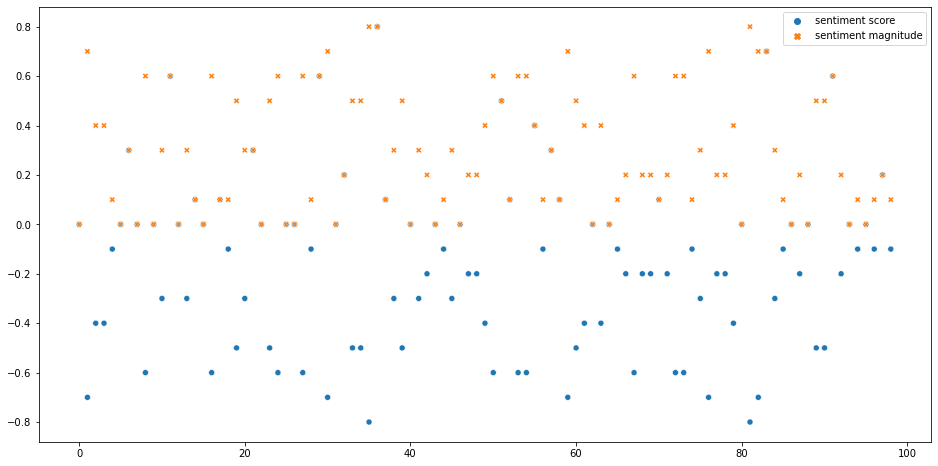

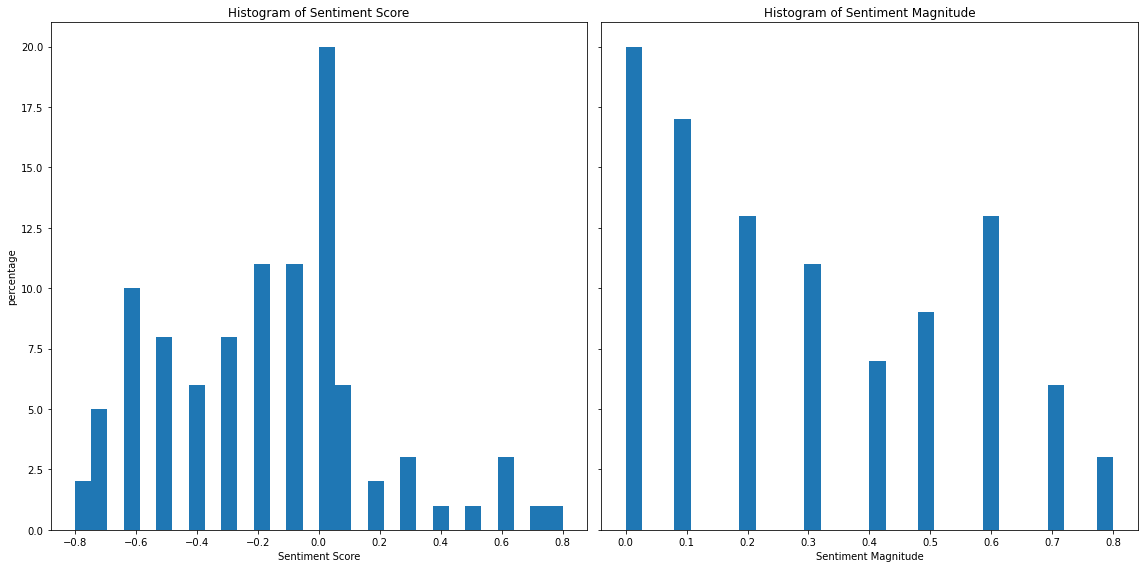

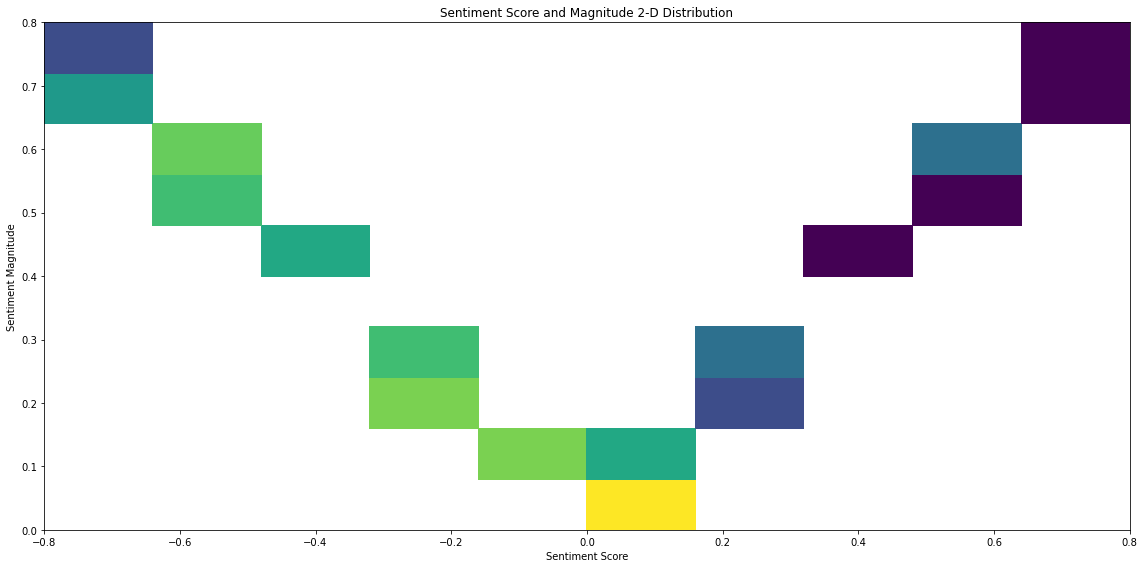

In [43]:
# Plot Sentiment Scores
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({'figure.figsize':(16,8)})

x = df_sentiment["sentiment score"]
y =  df_sentiment["sentiment magnitude"]

sns.scatterplot(data= df_sentiment[["sentiment score", "sentiment magnitude"]])
                
n_bins=30

#plt.hist(x, bins=n_bins)
#plt.show()

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
# We can set the number of bins with the `bins` kwarg
axs[0].set_xlabel("Sentiment Score")
axs[0].set_ylabel("percentage")
axs[0].set_title('Histogram of Sentiment Score')
axs[1].set_xlabel("Sentiment Magnitude")
axs[1].set_title('Histogram of Sentiment Magnitude')

axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)
plt.show()


fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(x, y, norm=colors.LogNorm())
plt.title("Sentiment Score and Magnitude 2-D Distribution")
ax.set_xlabel("Sentiment Score")
ax.set_ylabel("Sentiment Magnitude")

plt.show()